## HW2 Book Search


In [13]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT
from sklearn.cluster import KMeans
import glob
import numpy as np
import imageio 

def getdescriptor(image):
    siftextractor = SIFT()
    siftextractor.detect_and_extract(image)
    descriptors = siftextractor.descriptors
    return descriptors

paths = sorted(glob.glob("Childrens-Books/*.jpg"))

grayscale_images = [rgb2gray(imageio.imread(image)) for image in paths]

image_descriptors =[getdescriptor(gimage) for gimage in grayscale_images if getdescriptor(gimage) is not None]

stacked = np.vstack(image_descriptors)
kmeans = KMeans(n_clusters=1000, random_state=0) 
kmeans.fit(stacked)

C:\Users\msrik\AppData\Local\Temp\ipykernel_1832\291354236.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grayscale_images = [rgb2gray(imageio.imread(image)) for image in paths]


KMeans(n_clusters=1000, random_state=0)

In [14]:
cluster_labels = [kmeans.predict(descriptor) for descriptor in image_descriptors]

In [15]:
# text document
text_documents = [str(cluster_label) for cluster_label in cluster_labels]


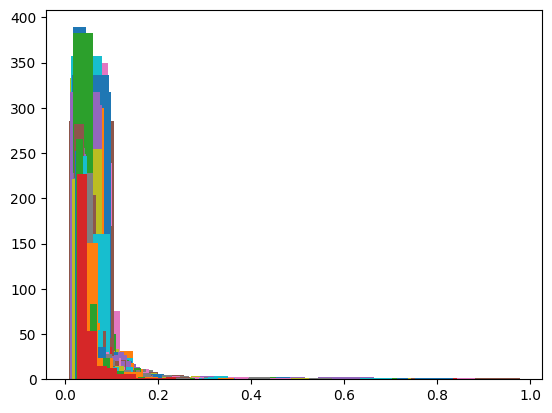

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
histogram_list = vectorizer.fit_transform(text_documents)
histogram_vals = [matrix.data for matrix in histogram_list]

for val in histogram_vals:
    plt.hist(val)


In [17]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5, metric='cosine')
neigh.fit((histogram_list))


NearestNeighbors(metric='cosine')

Test image search

C:\Users\msrik\AppData\Local\Temp\ipykernel_1832\706917333.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grayscale_query_images = [rgb2gray(imageio.imread(image)) for image in queries_paths]


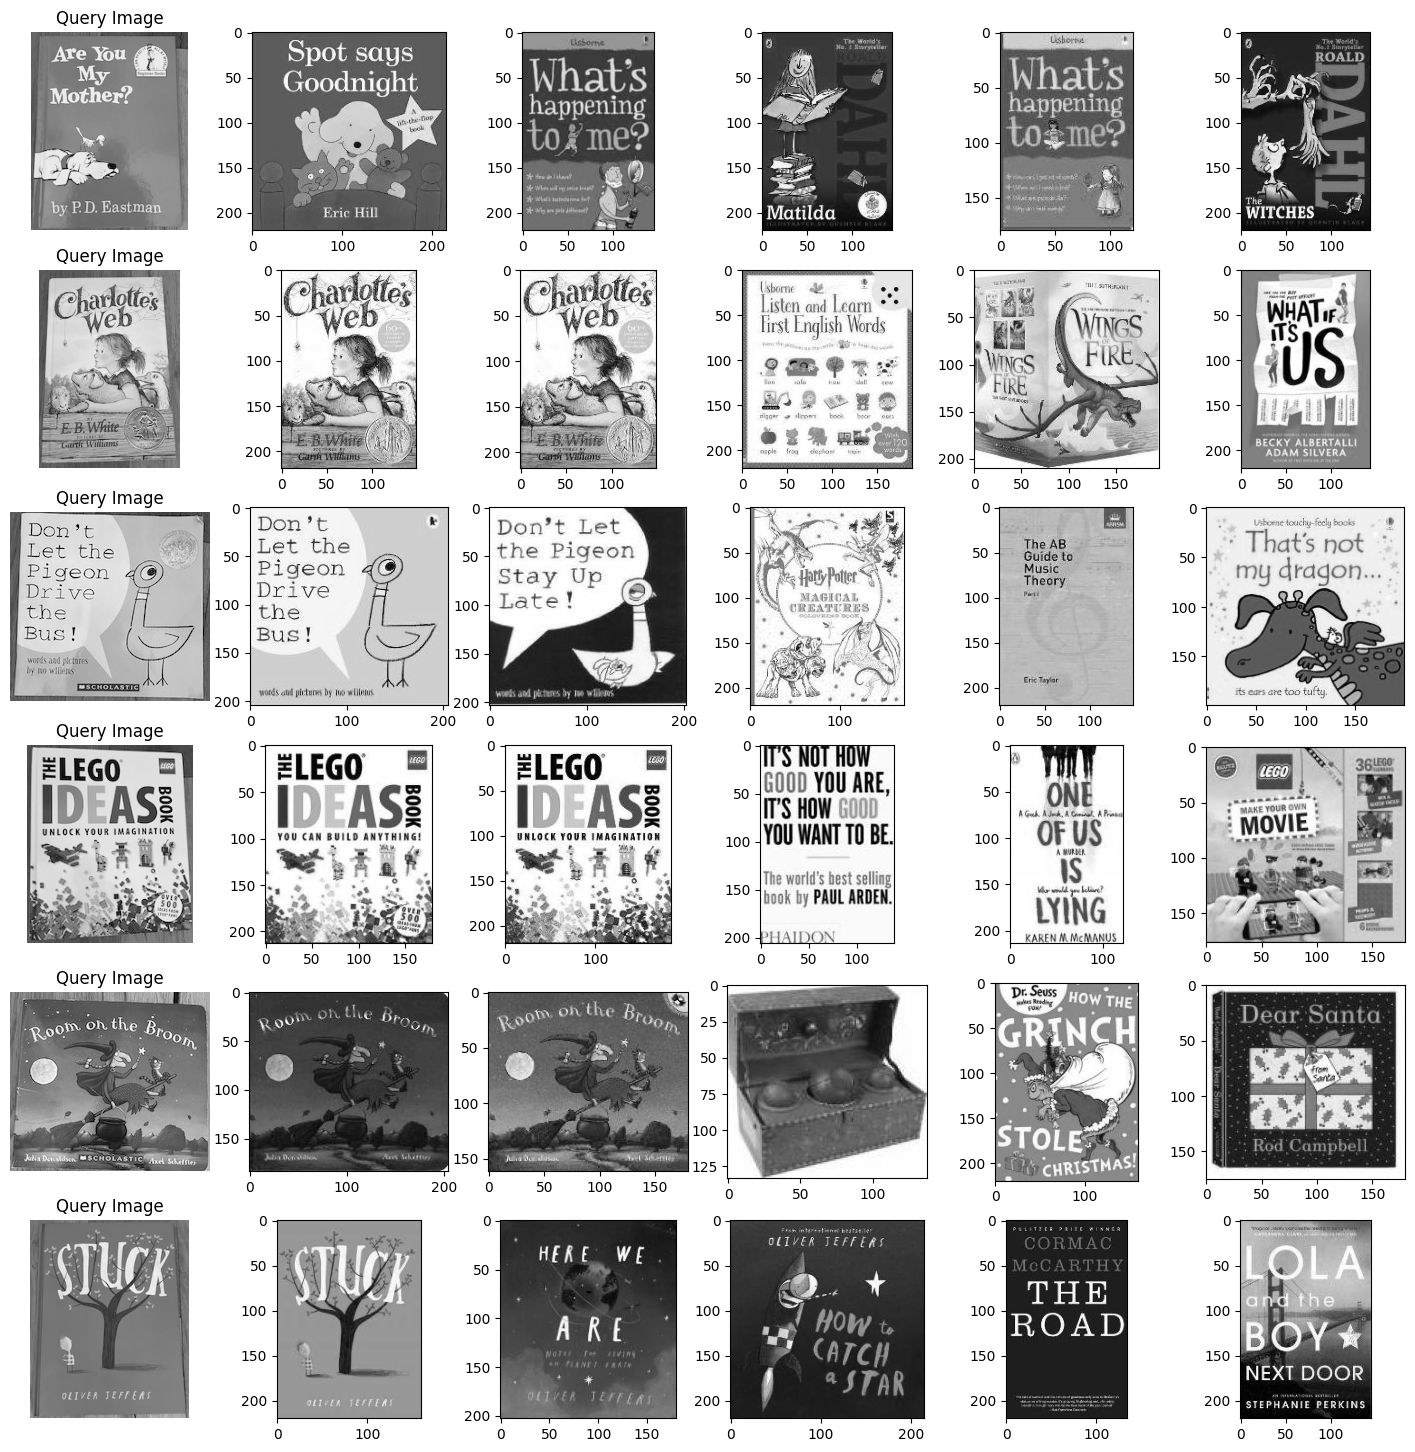

In [20]:
# step 8
from sklearn.neighbors import KNeighborsClassifier

queries_paths = sorted(glob.glob("queries/*.jpg"))
grayscale_query_images = [rgb2gray(imageio.imread(image)) for image in queries_paths]
query_img_descriptors =[getdescriptor(gimage) for gimage in grayscale_query_images if getdescriptor(gimage) is not None]

query_labels = [kmeans.predict(descriptor) for descriptor in query_img_descriptors]
query_documents = [str(cluster_label) for cluster_label in query_labels]
query_histograms = vectorizer.transform(query_documents) # can use transform since model is already fitted with training data

qstacked = np.vstack(query_img_descriptors)

k = 5 #default value

nearest_points = [neigh.kneighbors(query_histograms[row], n_neighbors=5, return_distance=False) # consulted chatgpt
                  for row in range(query_histograms.shape[0])]

numqueries = len(grayscale_query_images)
numcols = k + 1
fig, axs = plt.subplots(numqueries, numcols, figsize=(18, 3 * numqueries)) # asked chatgpt for sizing

for row in range(numqueries): # for each query
    axs[row, 0].imshow(grayscale_query_images[row], cmap='gray')
    axs[row, 0].set_title("Query Image")
    axs[row, 0].axis('off')
    for col in range(k): # for each neighbor
        neighbor_index = int(nearest_points[row][0][col])
        axs[row, col + 1].imshow(grayscale_images[neighbor_index], cmap='gray')
        
